In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [28]:
class Node():

  def __init__(self, x, y, demand):
    self.x = x
    self.y = y
    self.demand = demand

In [29]:
class COPKMeans():

  def __init__(self):
    pass

  @staticmethod
  def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

  def clusterize(self, nodes, n_clusters=5, n_iters=10, capacity=None):

    self.n_clusters = n_clusters
    self.n_nodes = len(nodes)
    centroids = random.sample(nodes, n_clusters)
    self.x, self.y = np.array([node.x for node in nodes]), np.array([node.y for node in nodes])
    self.cx, self.cy = np.array([node.x for node in centroids]), np.array([node.y for node in centroids])

    for _ in range(n_iters):
      if capacity is None: center_asig = self.__iteration_step()
      else: center_asig = self.__iteration_step_constrained(nodes, capacity)

    self.__plot(center_asig, nodes)

    return center_asig

  def __iteration_step(self):
    distances = np.full((self.n_nodes, self.n_clusters), np.inf)
    for i in range(self.n_nodes):
      for j in range(self.n_clusters):
        distances[i][j] = COPKMeans.euclidean_distance(self.x[i], self.y[i], self.cx[j], self.cy[j])
    cent_asig = np.argmin(distances, axis=1)
    for i in range(self.n_clusters):
      self.cx[i] = np.mean(self.x[cent_asig == i])
      self.cy[i] = np.mean(self.y[cent_asig == i])
    return cent_asig

  def __iteration_step_constrained(self, nodes, capacity):
    distances = np.full((self.n_nodes, self.n_clusters), np.inf)
    demand = np.zeros((self.n_nodes, self.n_clusters))
    for i in range(self.n_nodes):
      for j in range(self.n_clusters):
        distances[i][j] = COPKMeans.euclidean_distance(self.x[i], self.y[i], self.cx[j], self.cy[j])
    cent_asig = np.argmin(distances, axis=1)
    for i in range(self.n_clusters):
      self.cx[i] = np.mean(self.x[cent_asig == i])
      self.cy[i] = np.mean(self.y[cent_asig == i])
    return cent_asig

  def __plot(self, cent_asig, nodes):
    plt.scatter(self.cx, self.cy, c=[i for i in range(self.n_clusters)], marker="x")
    plt.scatter(self.x, self.y, c=cent_asig)
    for i, txt in enumerate([node.demand for node in nodes]):
        plt.annotate(txt, (self.x[i], self.y[i]))
    plt.show()

In [30]:
minv = 0
maxv = 100
cnt = 20
capacity = 200
nodes = [Node(random.randint(minv, maxv), random.randint(minv, maxv), random.randint(minv, maxv)) for i in range(cnt)]
depot = Node(50, 50, 0)

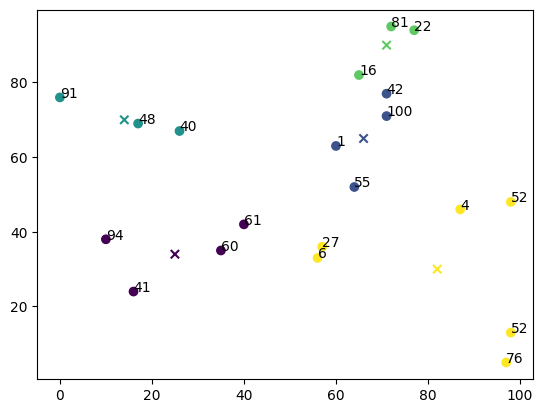

In [31]:
clusterizer = COPKMeans()
clusters = clusterizer.clusterize(nodes, capacity=capacity)